In [8]:
from linearalgebra import Vector

In [9]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

In [10]:
from typing import List
from linearalgebra import vector_mean

In [11]:
def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
                  clusters = [[] for i in range(k)]
                  for input, assignment in zip(inputs, assignments):
                      clusters[assignment].append(input)
                   
                  return [vector_mean(cluster) if cluster else random.choice(inputs) for cluster in clusters]

In [12]:
import itertools
import random
import tqdm
from linearalgebra import squared_distance

In [13]:
class Kmeans:
    def __init__(self, k: int) -> None:
        self.k = k
        self.means = None
    
    def classify(self, input: Vector) -> int:
        '''return the index of the cluster closest to the input'''
        return min(range(self.k), key=lambda i: squared_distance(input, self.means[i]))

    def train(self, inputs: List[Vector]) -> None:
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
                num_changed = num_differences(assignments, new_assignments) 
                if num_changed == 0:
                    return 
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"change: {num_changed} / {len(inputs)}")
                


In [14]:
inputss: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [15]:
random.seed(12)
clusterer = Kmeans(k=3)
clusterer.train(inputss)
means = sorted(clusterer.means)

change: 5 / 20: : 1it [00:00, 1003.18it/s]


In [16]:
squared_distance(means[0], [-44, 5])

0.19999999999999857

## Choosing K

In [17]:
from matplotlib import pyplot as plt

In [18]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    '''finds the total squared error from k-means clustering the inputs'''
    clusterer = Kmeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]

    return sum(squared_distance(input, means[cluster])
                                for input, cluster in zip(inputss, assignments))

In [19]:
ks = range(1, len(inputss) + 1)

In [20]:
errors = [squared_clustering_errors(inputss, k)
            for k in ks]

0it [00:00, ?it/s]
change: 2 / 20: : 2it [00:00, 765.59it/s]
change: 1 / 20: : 3it [00:00, 583.43it/s]
change: 1 / 20: : 3it [00:00, 372.12it/s]
change: 3 / 20: : 2it [00:00, 232.21it/s]
change: 1 / 20: : 3it [00:00, 166.00it/s]
change: 1 / 20: : 3it [00:00, 325.20it/s]
change: 1 / 20: : 3it [00:00, 196.75it/s]
change: 2 / 20: : 3it [00:00, 127.85it/s]
change: 12 / 20: : 1it [00:00, 173.57it/s]
change: 1 / 20: : 3it [00:00, 219.93it/s]
change: 1 / 20: : 3it [00:00, 209.73it/s]
change: 1 / 20: : 4it [00:00, 244.23it/s]
change: 3 / 20: : 2it [00:00, 196.47it/s]
change: 2 / 20: : 3it [00:00, 235.77it/s]
change: 2 / 20: : 3it [00:00, 210.84it/s]
change: 1 / 20: : 4it [00:00, 193.20it/s]
change: 1 / 20: : 4it [00:00, 208.85it/s]
change: 4 / 20: : 3it [00:00, 219.12it/s]
change: 1 / 20: : 5it [00:00, 225.15it/s]


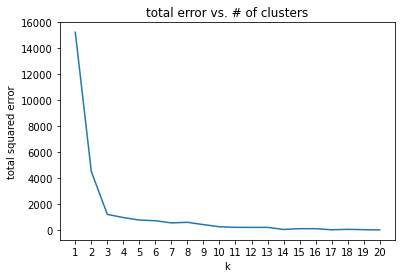

In [21]:
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel('k')
plt.ylabel('total squared error')
plt.title('total error vs. # of clusters')
plt.show()

## Play Ground

In [22]:
image_path = r'cat.jpg'

In [23]:
import matplotlib.image as mpimg

In [24]:
img = mpimg.imread(image_path) / 256

In [25]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [26]:
pixels = [pixel.tolist() for row in img for pixel in row]

In [27]:
clusterer = Kmeans(5)

In [28]:
clusterer.train(pixels)

change: 6 / 2160000: : 24it [31:30, 78.77s/it]


In [30]:
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]

In [31]:
new_img = [[recolor(pixel) for pixel in row]
            for row in img]

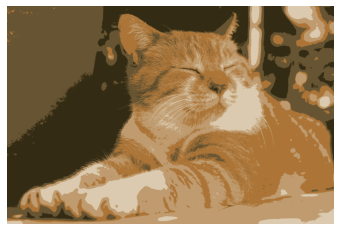

In [32]:
plt.imshow(new_img)
plt.axis('off')
plt.show()

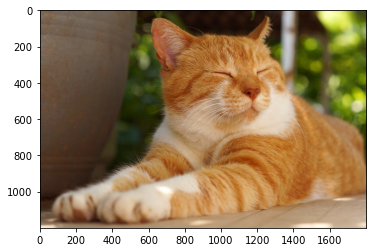

In [33]:
plt.imshow(img)

## Hierarchical Clustering